# Predicting Credit Card Fraud 🪪 Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model (using binary classification models in machine learning is an appropriate approach to detect fraudulent transactions).

we are going to take the following approach:
Problem definition, Data, Evaluation, Features, Modelling, Experimentation

## 1. Problem Definition

Build a binary classification model to detect fraudulent credit card transactions based on a dataset containing various features from credit card transactions.

## 2. Data 

The Data came from Kaggle Playground Series season 3, eposide 4
https://www.kaggle.com/competitions/playground-series-s3e4/data

## 3. Evaluation

If we can reach Models with higher AUC-ROC scores, generally these are considered more reliable for fraud detection tasks.

## Features

Certainly, here's the identification of the features in the dataset:

* `id`: This column seems to be an identifier or index for each transaction. It may not be a feature used for modeling, as it's typically a unique identifier for each row.


* `Time`: The seconds elapsed between this transaction and the first transaction in the dataset. 


* `V1` to `V28`: These are anonymized numerical features resulting from a PCA (Principal Component Analysis) transformation for security reasons. These are the primary features used for modeling.


* `Amount`: The transaction amount.


* `Class`: This is the target variable. It's a binary variable where `Class = 1` indicates a fraudulent transaction, and `Class = 0` indicates a legitimate transaction. This is the variable you're trying to predict.


### Preparing the tools 

we're going to use Numpy, Pandas and matplotlip for data analysis and manipulation.

### Load Data 

In [34]:
# Import the important Tools

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Models from Scikit_learn 
# classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evauation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


In [35]:
df = pd.read_csv("credit-fraud-dataset/train.csv", low_memory= False)
df.shape

(219129, 32)

### Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

* What question(s) are you trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [36]:
df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [37]:
# Let's find out how many of the class are a target

df.Class.value_counts()

0    218660
1       469
Name: Class, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [39]:
# Let's check if there is a missing data
df.isna().sum().max()


0

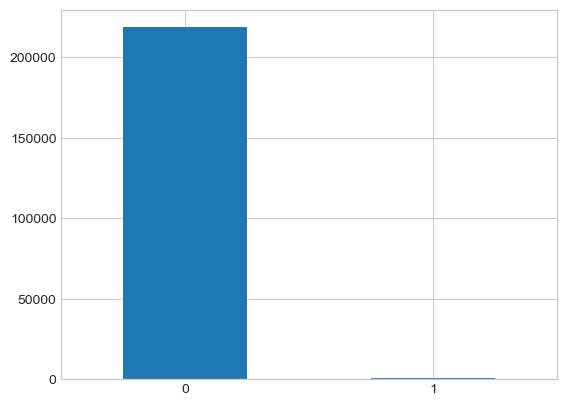

In [40]:
# checking the target classes in a virtualize form
df.Class.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0);

This indicate an imbalanced dataset, which will make a model generalize badly and causing overfitting in the model, so we will have to make it a balanced data set by:

**subsample the dataset**
* Essentially this is a method that will process the data to have an approximate 50-50 ratio.
* One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when you have little data)
* Another is UNDER-sampling, which deletes instances from the over-represented class (better when he have lot's of data)

Remember that the other columns are scaled `V1...Vn`, only the Time & amount are not scaled, so it ether we dropped them or scale them to get a good generalization. 


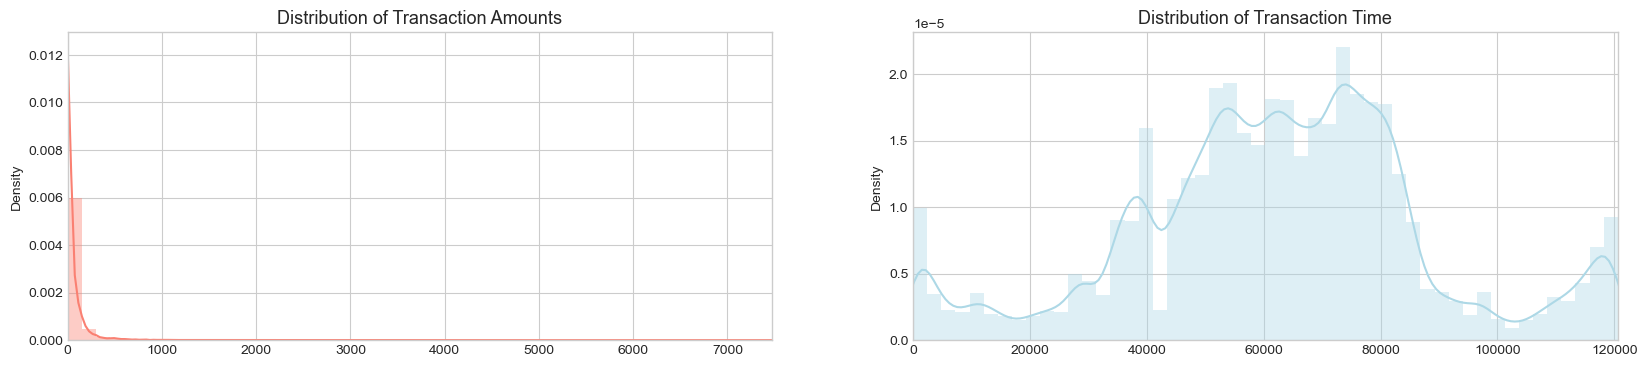

In [41]:
plt.style.use('seaborn-v0_8-whitegrid') # set the grid
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize = (20, 4))

# assign the values to a varible
amount_val = df.Amount.values
time_val = df.Time.values

sns.distplot(amount_val, ax=ax[0], color= 'salmon')
ax[0].set_title('Distribution of Transaction Amounts', fontsize = 13)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color= 'lightblue')
ax[1].set_title('Distribution of Transaction Time', fontsize = 13)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show();

*We will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the columns was scaled (PCA). We'll need to also create a resample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.*

In [42]:
# lets scale the amount and time 
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df.Amount.values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df.Time.values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis = 1, inplace= True)

In [43]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,0,-0.316492,-2.135774
1,1,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,0,0.986654,-2.135774
2,2,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,0,-0.305211,-2.135774
3,3,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,0,-0.332062,-2.135774
4,4,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,0,-0.332062,-2.135774


In [44]:
# lets change the position of the scaled values
scaled_amount = df.scaled_amount
scaled_time = df.scaled_time

df.drop(['scaled_amount', 'scaled_time', 'id'], axis = 1, inplace = True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# the two columns are scaled and reposition in the dataframe
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.316492,-2.135774,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,0
1,0.986654,-2.135774,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,0
2,-0.305211,-2.135774,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,0
3,-0.332062,-2.135774,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,0
4,-0.332062,-2.135774,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,0


In [45]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes

# Lets shuffle the data before creating the subsample

df = df.sample(frac= 1)

# the number of fraud classes is 469
fraud_df = df[df.Class == 1]
non_fraud_df = df[df.Class ==0][:469]

undersampled_df = pd.concat([fraud_df, non_fraud_df])

# shuffle the dataframe rows
new_df = undersampled_df.sample(frac= 1, random_state = 0)

In [46]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
145629,-0.332062,0.330967,1.295523,1.202913,-1.004770,1.325346,0.792847,-1.206512,0.666411,-0.396890,...,0.160118,-0.142515,-0.160547,-0.312379,-0.247549,0.999529,-0.262301,0.020760,0.050884,1
92096,-0.316174,-0.153721,-0.749152,0.824675,0.844699,-0.281656,1.051526,-0.752728,-3.386445,-2.726603,...,0.342848,-0.823978,0.163965,-2.391235,0.184744,-1.090898,-0.086714,0.382700,0.273746,1
45565,0.033365,-0.642466,1.450078,-0.292939,0.004909,-0.734394,-0.572328,-0.812182,-0.241708,-0.333718,...,-0.298867,-0.767472,-1.694858,0.154975,-0.114430,0.087647,0.819056,-0.068671,0.010135,0
155203,-0.335717,0.408741,-2.035184,1.929171,0.168828,-0.720727,-0.891156,-1.473069,-0.177789,1.285034,...,-0.194906,0.133848,0.328840,0.291412,1.074817,-0.271355,-0.078287,-0.039658,0.085034,1
152409,0.181919,0.382580,-1.294789,-0.065352,3.587914,3.231813,-0.966758,1.604576,-1.245740,0.898805,...,0.366764,0.277934,1.049572,-0.068582,0.539654,0.099447,0.403715,0.340144,0.144848,1


In [47]:
new_df.Class.value_counts() # Balanced class data

1    469
0    469
Name: Class, dtype: int64

In [48]:
# split the wholedata 
X = df.drop('Class', axis = 1)
y= df.Class

# split the subsample dataset

undersampled_X = new_df.drop('Class', axis = 1)
undersampled_y = new_df.Class

In [79]:
# whole dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

print(f"Total Number of Train dataset : {len(X_train)}"
      f"\nTotal Number of Test dataset : {len(X_test)}"
      f"\nTotal Number of Transactions : {len(X_train) + len(X_test)}")

# Undersampled

X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(undersampled_X,
                                                                                                        undersampled_y,
                                                                                                        test_size= 0.3,
                                                                                                        random_state = 42)

print(f"Total Number of undersampledTrain dataset : {len(X_train_undersampled)}"
      f"\nTotal Number of undersampledTest dataset : {len(X_test_undersampled)}"
      f"\nTotal Number of undersampled Transactions : {len(X_train_undersampled) + len(X_test_undersampled)}")
print(len(y_train_undersampled))
print(len(y_test_undersampled))

Total Number of Train dataset : 153390
Total Number of Test dataset : 65739
Total Number of Transactions : 219129
Total Number of undersampledTrain dataset : 656
Total Number of undersampledTest dataset : 282
Total Number of undersampled Transactions : 938
656
282


Distribution of Classes in the Subsampled Dataset
1    0.5
0    0.5
Name: Class, dtype: float64


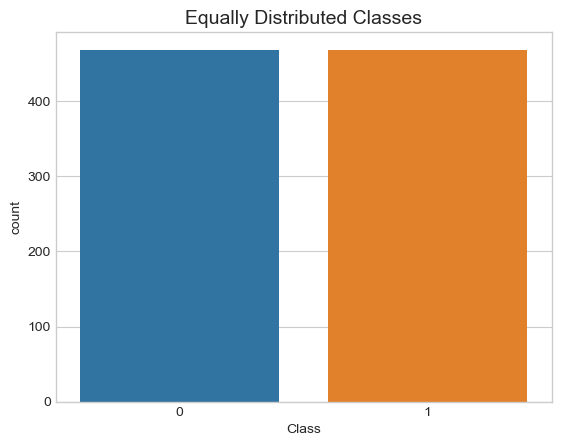

In [50]:
print(f"Distribution of Classes in the Subsampled Dataset"
      f"\n{new_df.Class.value_counts()/len(new_df)}")

sns.countplot(x= 'Class', data = new_df)
plt.title('Equally Distributed Classes', fontsize = 14)
plt.show();

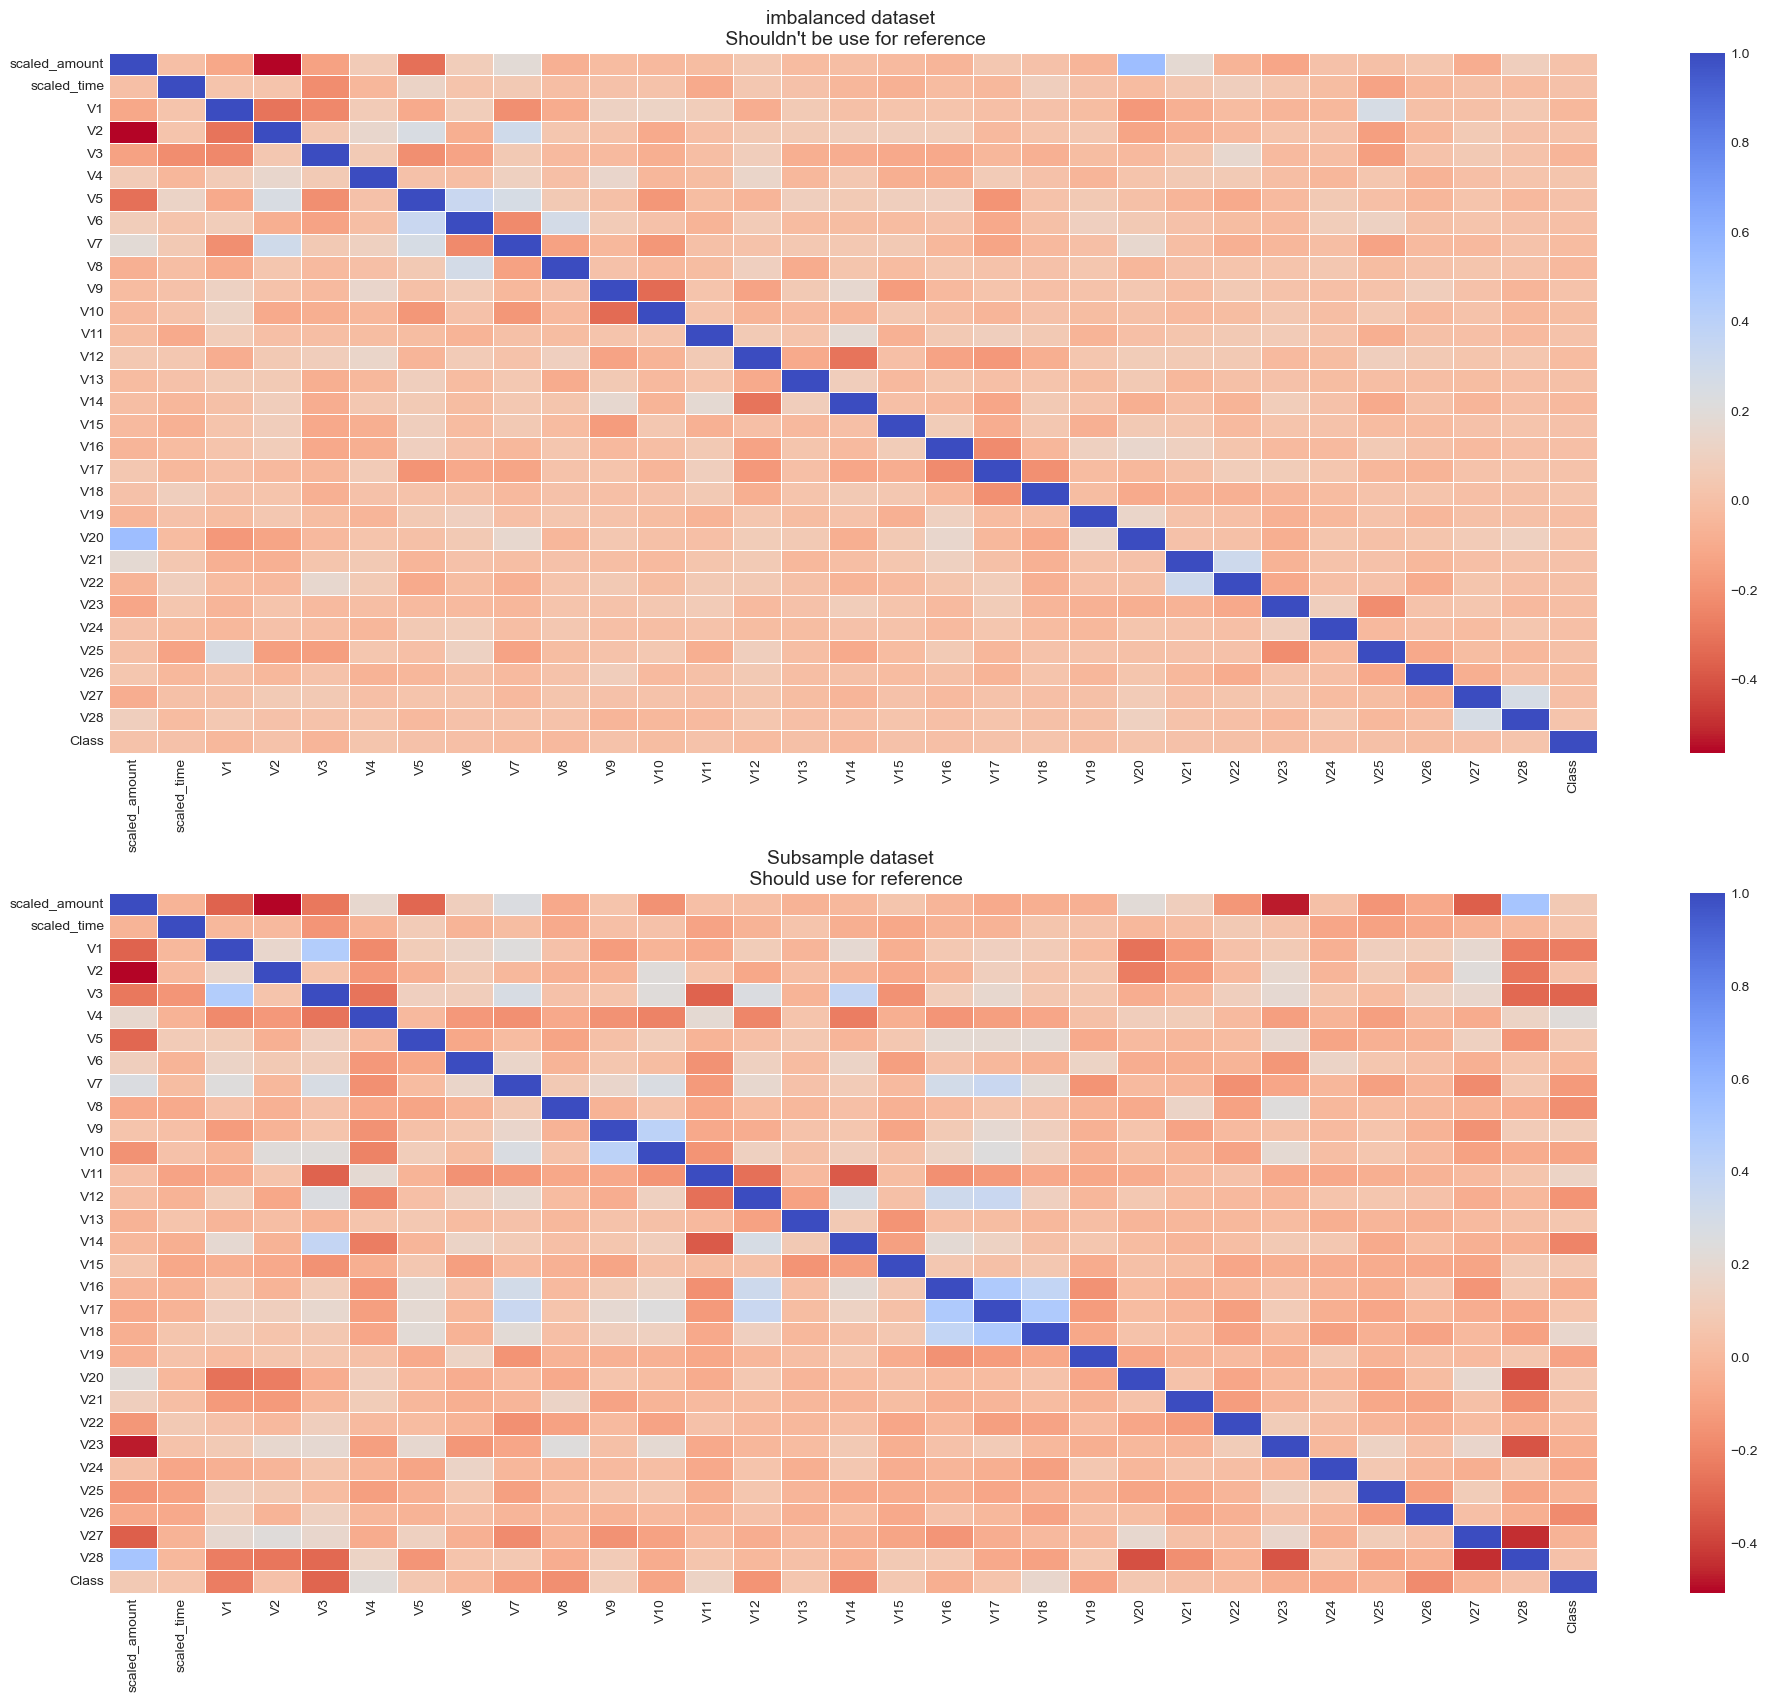

In [51]:
# the correlation will be affected if used on an imbalanced data
corr = new_df.corr()
corr0 = df.corr()
fig, (ax0, ax1) = plt.subplots(2, 1, figsize= (24, 20))

sns.heatmap(corr0, annot_kws= {'size': 20}, ax=ax0, linewidths= 0.5, cmap= 'coolwarm_r', fmt = ".2f")
ax0.set_xticklabels(corr0)
ax0.set_title("imbalanced dataset \n Shouldn't be use for reference", fontsize = 14)


sns.heatmap(corr, annot_kws= {'size': 20}, ax=ax1, linewidths= 0.5, cmap= 'coolwarm_r', fmt = ".2f")
ax1.set_xticklabels(corr); # arranging the x-axis
ax1.set_title('Subsample dataset \n Should use for reference', fontsize = 14);

 let's treat the extreme outliers in the dataset so we can get a more accuracy in our model generalization.
 we can see, we have more of negative correlations lets see if we can detect the extreme ones if none, we continue

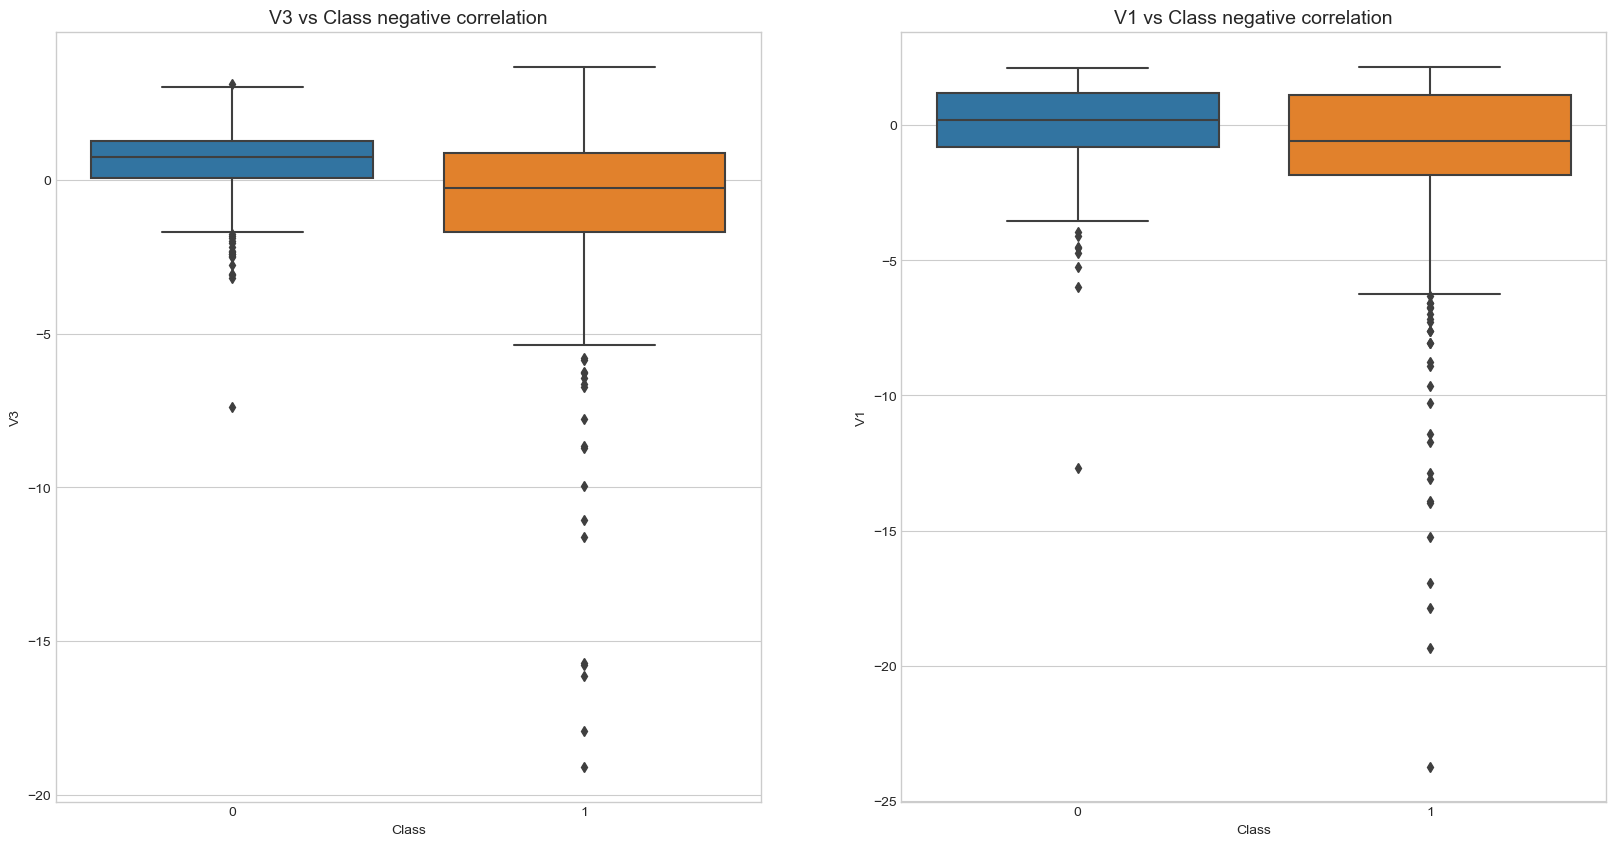

In [52]:
fig, ax = plt.subplots(ncols = 2, figsize =(20,10))

# Negative Correlations with our Class 
#(The lower our feature value the more likely it will be a fraud transaction)

sns.boxplot(x= 'Class', y= 'V3', data = new_df, ax=ax[0])
ax[0].set_title('V3 vs Class negative correlation', fontsize= 14)

sns.boxplot(x= 'Class', y= 'V1', data= new_df, ax=ax[1])
ax[1].set_title('V1 vs Class negative correlation', fontsize = 14);

Outliers with Negative correlated with labels are not that extreme which if removed might cause an information lost in the dataset and reduce the accuracyof our model

## Modelling 

In [53]:
# let's implement simple classifiers

classifiers = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'Support vector Classifier': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

def fit_and_score(classifiers, X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled):
    '''
    fits and evaluates given machine learning models
    '''
    # randomseed
    np.random.seed(42)
    # Make the list to keep the model scores
    model_scores= {}
    for name, classifier in classifiers.items():
        classifier.fit(X_train_undersampled, y_train_undersampled)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = classifier.score(X_test_undersampled, y_test_undersampled)
    return model_scores

In [54]:
classifier_scores = fit_and_score(classifiers=classifiers,
                                  X_train_undersampled=X_train_undersampled,
                                  X_test_undersampled=X_test_undersampled,
                                  y_train_undersampled=y_train_undersampled,
                                  y_test_undersampled=y_test_undersampled)
classifier_scores

{'LogisticRegression': 0.7553191489361702,
 'KNN': 0.6914893617021277,
 'RandomForest': 0.74822695035461,
 'Support vector Classifier': 0.723404255319149,
 'DecisionTreeClassifier': 0.6524822695035462}

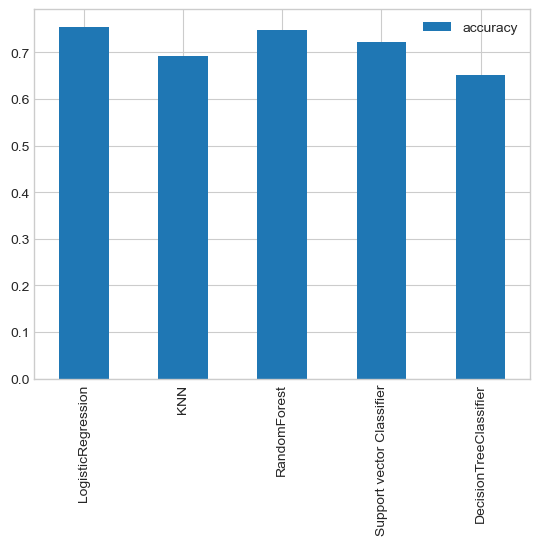

In [55]:
# lets virtualize our model accuracy 
compare_acc = pd.DataFrame(classifier_scores, index= ['accuracy'])
compare_acc.T.plot.bar();

We will need to improve our model by tuning the hyperparameters using GridSearchcv

### Improving Models

In [56]:
#logistic Regression

log_reg_grid = {"C": np.logspace(-5, 5, 30),
                "solver": ["liblinear"]}
grid_log_reg = GridSearchCV(LogisticRegression(),
                            param_grid= log_reg_grid)
grid_log_reg.fit(X_train_undersampled, y_train_undersampled)
"""
we automatically get the logistic regression with the best parameters
"""
log_reg = grid_log_reg.best_estimator_

In [57]:
# Support Vector Classifier
svc_grid = {'C': [0.5, 0.7, 0.9, 1], 
            'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), 
                        param_grid=svc_grid, verbose =True)
grid_svc.fit(X_train_undersampled, y_train_undersampled)

# SVC best estimator
svc = grid_svc.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [58]:
'''
# let use randomsearchcv
rf_grid = {"n_estimators": np.arange(10, 1200, 40),
           "max_depth": [None, 3, 5, 10, 20],
           "min_samples_split": np.arange(2, 30, 2),
           "min_samples_leaf": np.arange(1, 30, 2)}

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=30,
                           verbose=True)

rs_rf.fit(X_train_undersampled, y_train_undersampled)

# find the best params 
rs_rf.best_params_
'''

'\n# let use randomsearchcv\nrf_grid = {"n_estimators": np.arange(10, 1200, 40),\n           "max_depth": [None, 3, 5, 10, 20],\n           "min_samples_split": np.arange(2, 30, 2),\n           "min_samples_leaf": np.arange(1, 30, 2)}\n\n# Setup random hyperparameter search for RandomForestClassifier\nrs_rf = RandomizedSearchCV(RandomForestClassifier(),\n                           param_distributions=rf_grid,\n                           cv=5,\n                           n_iter=30,\n                           verbose=True)\n\nrs_rf.fit(X_train_undersampled, y_train_undersampled)\n\n# find the best params \nrs_rf.best_params_\n'

In [60]:
# Random fores classifier
# using gridsearchcv

rf_grid1= {'n_estimators': [1010],
           'min_samples_split': [8],
           'min_samples_leaf': [23],
           'max_depth': [None]}


grid_rf= GridSearchCV(RandomForestClassifier(),
                     param_grid= rf_grid1,
                     verbose = True)

grid_rf.fit(X_train_undersampled, y_train_undersampled)

# rf best estimator
rf_clf = grid_rf.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [61]:
# using cross validation score to evaluate our classification models


log_reg_score = cross_val_score(log_reg, X_train_undersampled, y_train_undersampled, cv=5)
print(f'Logistic Regression Cross Validation Score: {log_reg_score.mean() * 100 :.2f}%')

svc_score = cross_val_score(svc, X_train_undersampled, y_train_undersampled, cv=5)
print(f'Support Vector Classifier Cross Validation Score: {svc_score.mean() * 100 :.2f}%')

rf_score = cross_val_score(rf_clf, X_train_undersampled, y_train_undersampled, cv = 5)
print(f"RandomForest Classifier Cross Validation Score: {rf_score.mean() * 100 :.2f}%")

Logistic Regression Cross Validation Score: 70.43%
Support Vector Classifier Cross Validation Score: 71.80%
RandomForest Classifier Cross Validation Score: 74.23%


In [82]:
len(y_pred_undersampled_proba), len(y_test_undersampled)

(564, 282)

In [62]:
y_pred_undersampled_proba1 = rf_clf.predict_proba(X_test_undersampled.values)


In [74]:
y_test_undersampled

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [86]:
auc_score = roc_auc_score(y_test_undersampled,y_pred_undersampled_proba1[:,1])
# Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
print(f"AUC-ROC Score: {auc_score:.4f}")

AUC-ROC Score: 0.8178


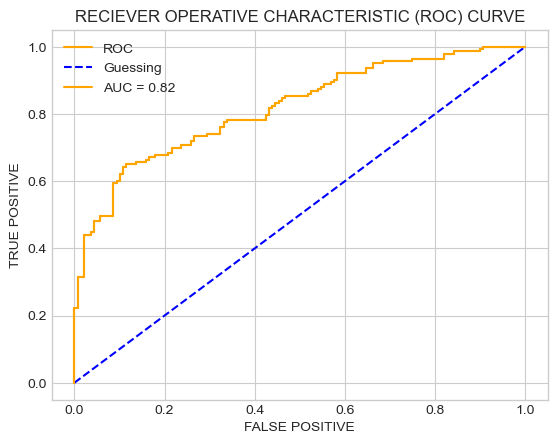

In [85]:


#calculate the rate fpr, tpr and threshold
fpr, tpr, threshold= roc_curve(y_test_undersampled.values.ravel(), y_pred_undersampled_proba1[:,1])

# For the calculation to make sense lets plot it using my function

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, color= 'orange', label= 'ROC') # model plot 
    #create a guessed plot 
    plt.plot([0,1], [0,1], linestyle= '--', color= 'b', label= 'Guessing')
    # add the auc score
    plt.plot(fpr, tpr, 'orange',label='AUC = %0.2f'% auc_score)
    # customized the plot
    plt.xlabel('FALSE POSITIVE')
    plt.ylabel('TRUE POSITIVE')
    plt.title('RECIEVER OPERATIVE CHARACTERISTIC (ROC) CURVE')
    plt.legend()
    plt.show()
plot_roc(fpr,tpr)

remember we are doing this on a train dataset, let try the model on a test dataset

In [112]:
test_df = pd.read_csv("credit-fraud-dataset/test.csv")
test_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [113]:
# lets scale the amount and time 
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

test_df['scaled_amount'] = rob_scaler.fit_transform(test_df.Amount.values.reshape(-1,1))
test_df['scaled_time'] = rob_scaler.fit_transform(test_df.Time.values.reshape(-1,1))

test_df.drop(['Time', 'Amount'], axis = 1, inplace= True)

In [114]:
# lets change the position of the scaled values
scaled_amount = test_df.scaled_amount
scaled_time = test_df.scaled_time

test_df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
test_df.insert(0, 'scaled_amount', scaled_amount)
test_df.insert(1, 'scaled_time', scaled_time)

# the two columns are scaled and reposition in the dataframe
test_df.head()

,scaled_amount,scaled_time,id,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.135977,-1.020092,219129,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,...,0.579121,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944
1,2.361440,-1.020092,219130,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,...,-0.066264,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690
2,-0.096484,-1.020092,219131,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,...,0.010671,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855
3,1.652891,-1.020092,219132,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,...,1.207085,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143
4,-0.330112,-1.020092,219133,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,...,-0.267098,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537


In [116]:
Id = test_df.id

test_df.drop('id', axis=1 , inplace = True)

In [117]:
pred_test = rf_clf.predict_proba(test_df)
pred_test

array([[0.4262395 , 0.5737605 ],
       [0.56117683, 0.43882317],
       [0.60891079, 0.39108921],
       ...,
       [0.48263115, 0.51736885],
       [0.69175767, 0.30824233],
       [0.5437321 , 0.4562679 ]])

In [105]:
len(pred_test)

146087

In [107]:
pred_test2 = rf_clf.predict(test_df.values)
pred_test2[:200]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0], dtype=int64)

In [119]:
test_df.insert(0, 'id', Id)
test_df.head()

,id,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,219129,0.135977,-1.020092,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,...,0.579121,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944
1,219130,2.361440,-1.020092,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,...,-0.066264,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690
2,219131,-0.096484,-1.020092,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,...,0.010671,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855
3,219132,1.652891,-1.020092,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,...,1.207085,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143
4,219133,-0.330112,-1.020092,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,...,-0.267098,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537


In [120]:
# creating the Dataframe suitable for kaggle submission
df_preds = pd.DataFrame()
df_preds['id'] = test_df['id']
df_preds['Class'] = pred_test[:,1]
df_preds

,id,Class
0,219129,0.573760
1,219130,0.438823
2,219131,0.391089
3,219132,0.589176
4,219133,0.391519
...,...,...
146082,365211,0.308942
146083,365212,0.514292
146084,365213,0.517369
146085,365214,0.308242


In [122]:
df_preds.to_csv('submission.csv', index= False)

*In the kaggle competition Binary Classification with a Tabular Credit Card Fraud Dataset
Playground Series - Season 3, Episode 4 - after submission my AUC-ROC score is 0.80499, My model's performance demonstrates its effectiveness in distinguishing fraudulent from legitimate transactions with high accuracy. it's essential to remember that credit card fraud detection is an intricate problem with constantly evolving fraud tactics.*


*The competition leaderboard, with its top score of 0.83, suggests that there may still be room for improvement. However, this project was a significant achievement, and I'm proud of the progress I made. It's a testament to my dedication to data science and my ability to tackle complex real-world problems. - https://www.kaggle.com/competitions/playground-series-s3e4/leaderboard#*


In [123]:
# Let's virtualize our project features importance
#  Random Forest classifier lets use feature importance attribute

rf_clf.fit(X_train_undersampled, y_train_undersampled)

RandomForestClassifier(min_samples_leaf=23, min_samples_split=8,
                       n_estimators=1010)

In [125]:
# check the coef_
rf_clf.feature_importances_

array([0.02303739, 0.00571958, 0.03904781, 0.08913621, 0.11987856,
       0.04920303, 0.01241861, 0.01362235, 0.01798124, 0.07174187,
       0.02666147, 0.11175592, 0.01356424, 0.01233897, 0.00773215,
       0.05849585, 0.01100831, 0.01257228, 0.05566882, 0.06077833,
       0.01212824, 0.02857717, 0.02576648, 0.00813937, 0.00853347,
       0.01128279, 0.01402445, 0.05207408, 0.00949262, 0.01761834])

In [129]:
# helper fuction for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                        "feature_importances": importances})
          .sort_values('feature_importances', ascending = False)
          .reset_index(drop = True))
    # plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis();

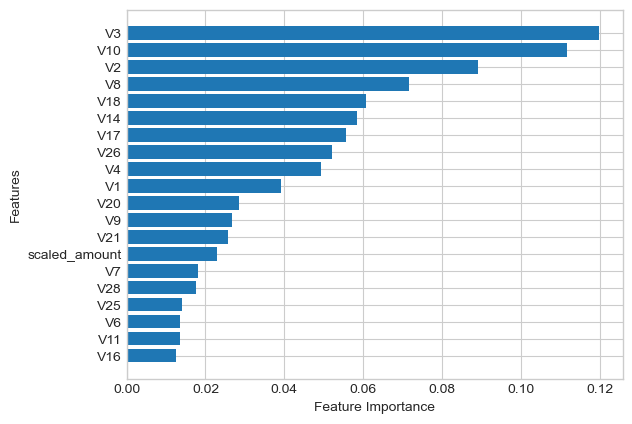

In [130]:
plot_features(X_train_undersampled.columns, rf_clf.feature_importances_);